In [1]:
# importing dependencies
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
from PIL import Image,ImageOps
import cv2 as cv

Saving abc.jpg to abc.jpg


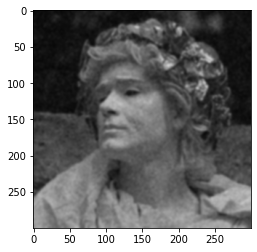

In [4]:
# reading the statue of image and running it through our denoising algorithm
figurehead = cv.imread('abc.jpg')
deno = denos(figurehead,50)
cleanfigurehead = cv.GaussianBlur(deno,(7,7),0)
cleanfigurehead = np.uint8(cleanfigurehead)
clean = Image.fromarray(cleanfigurehead)
plt.imshow(clean)

In [5]:
# To resize the resolution of an image we make use of the resize functionality of the PIL library
def size_change(img,res):

  img_new = img.resize(res)
  img_new.save('out.jpg')
  files.download('out.jpg')
  return img_new

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

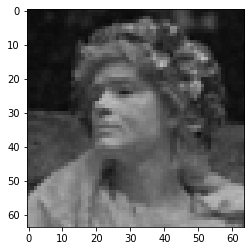

In [6]:
resized_image_64 = size_change(clean,(64,64))
plt.imshow(resized_image_64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

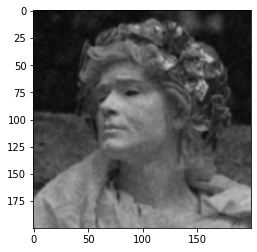

In [7]:
resized_image_200 = size_change(clean,(200,200))
plt.imshow(resized_image_200)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

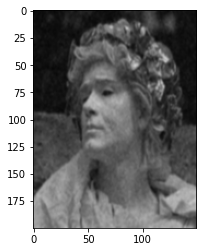

In [8]:
resized_image_152 = size_change(clean,(150,200))
plt.imshow(resized_image_152)

In [15]:
'''
Here we will display two kinds of cropping techniques. 
One technique is a simple percentage based crop, where you specify 
the percentage of image that you wish to crop in, and whether you want the 
cropping to be done from the start or from the end

The other form of cropping is a box based crop, where by specifying the 
corner values of the top left and bottom right corners of the crop we 
obtain the cropped image. 
'''
def crop(img,horiz_percentage,vert_percentage,horiz_orient,vert_orient):              
  '''
  Inputs : 
  img : The image you wish to crop
  horiz_percentage : The percentage of the image you wish to keep in wrt to the
                     horizontal axis
  vert_percentage : The percentage of the image you wish to keep in wrt to the
                    vertical axis
  horiz_orient : 0 if you wish to start from the left, 1 for right
  vert_orient : 0 if you wish to start from the top, 1 for bottom
  Outputs : 
  img_resized : cropped image
  '''
  img_array = np.array(img)
  img_resized = img_array
  hoffset = np.uint8(img_array.shape[0]*horiz_percentage)
  #print(hoffset)
  voffset = np.uint8(img_array.shape[1]*vert_percentage)
  #print(voffset)
  if horiz_orient == 0:
    img_resized = img_resized[:hoffset,:,:]
  else:
    img_resized = img_resized[img_resized.shape[0]-hoffset:,:,:]
  if vert_orient == 0:
    img_resized = img_resized[:,:voffset,:]
  else:
    img_resized = img_resized[:,img_resized.shape[1]-voffset:,:]
  img_resized = Image.fromarray(img_resized)
  return img_resized

def pixel_crop(img,lx,ly,rx,ry):
  '''
  Inputs : 
  img : The image you wish to crop
  lx : x-coordinate of the top-left corner
  ly : y-coordinate of the top-left corner
  rx : x-coordinate of the bottom-right corner
  ry : y-coordinate of the bottom-right corner

  Outputs : 
  img_resized : The cropped image
  '''
  img_array = np.array(img)
  img_resized = img_array[lx:rx,ly:ry,:]
  img_resized = Image.fromarray(img_resized)
  return img_resized

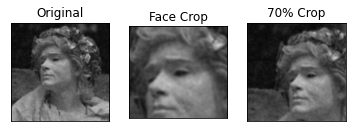

In [17]:
percentage_cropped = crop(clean,0.7,0.7,0,0)
pixel_cropped = pixel_crop(clean,50,65,175,200)
plt.subplot(131)
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.imshow(clean)
plt.subplot(132)
plt.title('Face Crop')
plt.xticks([])
plt.yticks([])
plt.imshow(pixel_cropped)
plt.subplot(133)
plt.title('70% Crop')
plt.xticks([])
plt.yticks([])
plt.imshow(percentage_cropped)

In [3]:
def denos(image,weight,eps = 1e-3,iter = 200):

  u = np.zeros_like(image)
  px = np.zeros_like(image)
  py = np.zeros_like(image)

  nm = np.prod(image.shape[:2])
  t = 0.125

  i = 0
  while i < iter:
    u_old = u

    ux = np.roll(u,-1,axis = 1) - u
    uy = np.roll(u,-1,axis = 0) - u

    px_new = px + (ux*t)/weight
    py_new = py + (uy*t)/weight

    norm_new = np.maximum(1,np.linalg.norm(px_new**2 + py_new**2))
    px = px_new/norm_new
    py = py_new/norm_new

    rx = np.roll(px,-1,axis = 1)
    ry = np.roll(py,-1,axis = 0)
    divergence = (px - rx) + (py - ry)

    u = image + weight*divergence

    error = np.linalg.norm(u - u_old)/np.sqrt(nm)

    if i == 0:
      err_init = error
      err_prev = error
    else:
      e_prev = error
    i += 1
  return u